<a href="https://colab.research.google.com/github/manshisharma1372/-Diamonds-price-analysis-and-prediction/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import sklearn as lr
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [4]:
diamonds= pd.read_csv('/diamonds.csv')

In [5]:
print(diamonds)

       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  

In [6]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
diamonds.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [8]:
#data cleaning
diamonds.describe() #Length or Width or Height cannot have zero value.So  I will look how many rows have zero value and remove it.

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
len(diamonds[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)]) #We see that there are 20 rows with 'zero' value, so we will drop them.

20

In [10]:
diamonds = diamonds[(diamonds[['x','y','z']] != 0).all(axis=1)]
diamonds.loc[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z


In [11]:
diamonds.shape

(53920, 11)

In [12]:
diamonds.isnull().sum()   #One can see that there is no missing values.Dropping unnecessary columns



Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [13]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


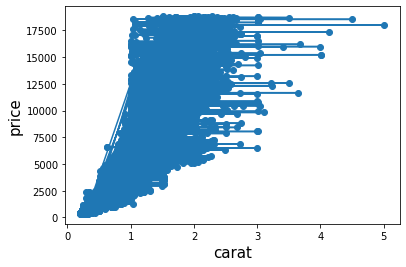

In [16]:
#price rise
y1 = diamonds['price']
x1 = diamonds['carat']
plt.subplot(1,1,1)
plt.plot(x1,y1)
plt.scatter(x1,y1)
plt.xlabel('carat',fontsize = 15)
plt.ylabel('price',fontsize = 15)
plt.show()

(array([2.5155e+04, 1.8615e+04, 7.1260e+03, 2.3480e+03, 6.1000e+02,
        5.2000e+01, 6.0000e+00, 5.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([0.2  , 0.681, 1.162, 1.643, 2.124, 2.605, 3.086, 3.567, 4.048,
        4.529, 5.01 ]),
 <a list of 10 Patch objects>)

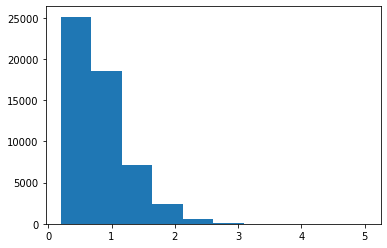

In [14]:
#histogram of carat
ar_carat=np.array(diamonds['carat'])
plt.hist(ar_carat)

#The Histogram Chart confirms that the distribution of carat is slightly skewed left with a peak.

(array([3.0000e+00, 0.0000e+00, 1.1000e+01, 2.6800e+02, 1.2071e+04,
        4.0350e+04, 1.1320e+03, 7.8000e+01, 4.0000e+00, 3.0000e+00]),
 array([43. , 46.6, 50.2, 53.8, 57.4, 61. , 64.6, 68.2, 71.8, 75.4, 79. ]),
 <a list of 10 Patch objects>)

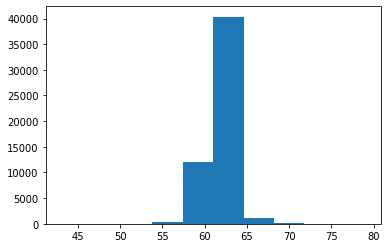

In [17]:
#histogram of depth
ar_depth=np.array(diamonds['depth'])
plt.hist(ar_depth)


#The Histogram Chart confirms that the distribution of depth is slightly skewed right with a peak

(array([2.0000e+00, 6.5500e+02, 3.7548e+04, 1.5127e+04, 5.6200e+02,
        2.3000e+01, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([43. , 48.2, 53.4, 58.6, 63.8, 69. , 74.2, 79.4, 84.6, 89.8, 95. ]),
 <a list of 10 Patch objects>)

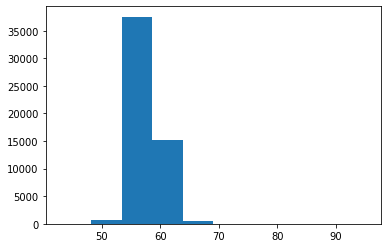

In [18]:
#histogram of table
ar_table=np.array(diamonds['table'])
plt.hist(ar_table)


#The Histogram Chart confirms that the distribution of table is slightly skewed left with a peak.

(array([25333.,  9323.,  7389.,  3877.,  2364.,  1745.,  1304.,  1002.,
          861.,   722.]),
 array([  326. ,  2175.7,  4025.4,  5875.1,  7724.8,  9574.5, 11424.2,
        13273.9, 15123.6, 16973.3, 18823. ]),
 <a list of 10 Patch objects>)

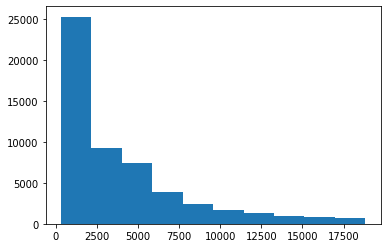

In [19]:
#histogram of price
ar_price=np.array(diamonds['price'])
plt.hist(ar_price)


#The Histogram Chart confirms that the distribution of price is slightly skewed left with a peak

In [20]:
#mean
print(diamonds.mean())

Unnamed: 0    26972.355731
carat             0.797698
depth            61.749514
table            57.456834
price          3930.993231
x                 5.731627
y                 5.734887
z                 3.540046
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [21]:
#median
print(diamonds.median())

Unnamed: 0    26973.50
carat             0.70
depth            61.80
table            57.00
price          2401.00
x                 5.70
y                 5.71
z                 3.53
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [22]:
#mode
x2 = diamonds['price']
x=stats.mode(x2)
print(x)

ModeResult(mode=array([605]), count=array([132]))


In [23]:
#Standard deviation
s=diamonds['price']
sd=np.std(s)
print(sd)

3987.2434717641318


In [24]:
#variance
v=diamonds['price']
variance=np.var(s)
print(variance)

15898110.503125686


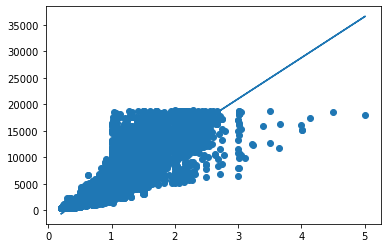

0.9215920634723982
predicted price: 226.07673426015344


In [25]:
#linear regression of Price
m = diamonds['price']
n = diamonds['carat']

slope, intercept, r, p, std_err = stats.linregress(n, m)

def myfunc(n):
  return slope * n + intercept

mymodel = list(map(myfunc, n))
plt.scatter(n, m)

plt.plot(n, mymodel)
plt.show()

#The coefficient of correlation - r

print(r)    #The result 0.92 shows that there is a very good relationship, and we can use polynomial regression in future predictions.


#predicting price...
price1 = myfunc(0.32)
print("predicted price:",price1)


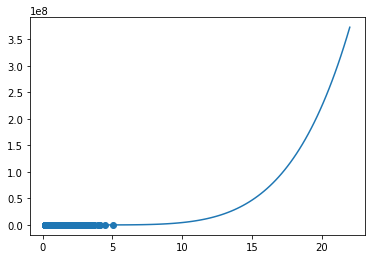

price predicted= 736.7299143134886


In [26]:
#poly regression of Price
m = diamonds['price']
n = diamonds['carat']

mymodel = np.poly1d(np.polyfit(n, m, 5))

myline = np.linspace(1, 22, 100)

plt.scatter(n, m)
plt.plot(myline, mymodel(myline))
plt.show()

#predicting price...

price = mymodel(0.32)
print("price predicted=",price)

In [69]:
print(r2_score(m, mymodel(n)))  #The result 0.87 shows good relation but less than linear regression for future predictions.

0.8700001232790727
